## Q Table

In [ ]:
# objective is to get the cart to the flag.
# for now, let's just move randomly:

import gym
import numpy as np

env = gym.make("MountainCar-v0")

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 25000
SHOW_EVERY = 3000

DISCRETE_OS_SIZE = [20, 20]
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)


q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table

for episode in range(EPISODES):
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
            print(f"We made it on episode {episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value


env.close()

## Q-Learning Analysis

0
Episode:     0, average reward: -0.2, current epsilon: 1.00
Episode:  1000, average reward: -200.0, current epsilon: 0.92
Episode:  2000, average reward: -200.0, current epsilon: 0.84
3000
Episode:  3000, average reward: -200.0, current epsilon: 0.76
Episode:  4000, average reward: -200.0, current epsilon: 0.68
Episode:  5000, average reward: -200.0, current epsilon: 0.60
6000
Episode:  6000, average reward: -200.0, current epsilon: 0.52
Episode:  7000, average reward: -199.7, current epsilon: 0.44
Episode:  8000, average reward: -198.0, current epsilon: 0.36
9000
Episode:  9000, average reward: -195.2, current epsilon: 0.28
Episode: 10000, average reward: -190.1, current epsilon: 0.20
Episode: 11000, average reward: -190.9, current epsilon: 0.12
12000
Episode: 12000, average reward: -183.3, current epsilon: 0.04
Episode: 13000, average reward: -166.3, current epsilon: -0.00
Episode: 14000, average reward: -157.4, current epsilon: -0.00
15000
Episode: 15000, average reward: -161.2, c

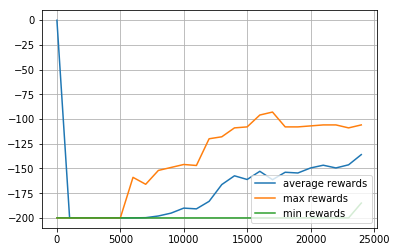

In [6]:
# objective is to get the cart to the flag.
# for now, let's just move randomly:

import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


env = gym.make("MountainCar-v0")

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 25000
SHOW_EVERY = 3000
STATS_EVERY = 1000

DISCRETE_OS_SIZE = [40] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

# For stats
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table

for episode in range(EPISODES):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
#             print(f"We made it on episode {episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
        
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')
        
    if episode % 100 == 0:
        np.save(f"qtables/{episode}-qtable.npy", q_table)

env.close()

plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.grid(True)
plt.show()

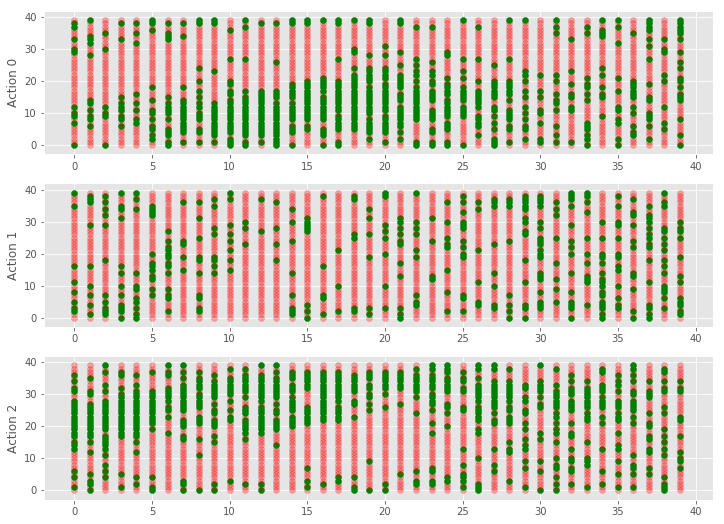

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')


def get_q_color(value, vals):
    if value == max(vals):
        return "green", 1.0
    else:
        return "red", 0.3


fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

i = 24900
q_table = np.load(f"qtables/{i}-qtable.npy")


for x, x_vals in enumerate(q_table):
    for y, y_vals in enumerate(x_vals):
        ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
        ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
        ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

        ax1.set_ylabel("Action 0")
        ax2.set_ylabel("Action 1")
        ax3.set_ylabel("Action 2")


plt.show()

In [14]:
fig = plt.figure(figsize=(12, 9))


for i in range(0, 25000, 100):
    print(i)
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    q_table = np.load(f"qtables/{i}-qtable.npy")

    for x, x_vals in enumerate(q_table):
        for y, y_vals in enumerate(x_vals):
            ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
            ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
            ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

            ax1.set_ylabel("Action 0")
            ax2.set_ylabel("Action 1")
            ax3.set_ylabel("Action 2")

    #plt.show()
    plt.savefig(f"qtable_charts/{i}.png")
    plt.clf()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

<Figure size 864x648 with 0 Axes>

In [2]:
import cv2
import os


def make_video():
    # windows:
#     fourcc = cv2.VideoWriter_fourcc(*'XVID')
    # Linux:
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    out = cv2.VideoWriter('qlearn.avi', fourcc, 60.0, (1200, 900))

    for i in range(0, 14000, 100):
        img_path = f"qtable_charts/{i}.png"
        frame = cv2.imread(img_path)
        out.write(frame)

    out.release()

make_video()